## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import json
import requests
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in csv files: original file is too big to read in as a whole.
location = "locations.csv"
location_df = pd.read_csv(location)

date_time = "date_time.csv"
date_time_df = pd.read_csv(date_time)

weather = "weather.csv"
weather_df = pd.read_csv(weather)

severity = "severity.csv"
severity_df = pd.read_csv(severity)

In [3]:
#Merge files
df = pd.concat([date_time_df, location_df, severity_df, weather_df], axis=1, join='inner')
#df.set_index('ID', inplace=True)
accident_df = pd.DataFrame(df)

In [4]:
#Ensure data is read in and merged correctly
accident_df.head()

,ID,Start_Time,Date,Time,Mil_Time,Month,Day,Year,ID,Street,...,Severity,Side,ID,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,A-10000,1/6/2017 16:22,1/6/2017,4:22 PM,16:22,January,Friday,2017,A-10000,I-80 W,...,3,R,A-10000,46.0,71.0,10.0,NW,8.1,NaN,Clear
1,A-10001,1/6/2017 16:18,1/6/2017,4:18 PM,16:18,January,Friday,2017,A-10001,CA-99 N,...,2,R,A-10001,48.9,52.0,10.0,South,6.9,NaN,Clear
2,A-10002,1/6/2017 16:17,1/6/2017,4:17 PM,16:17,January,Friday,2017,A-10002,CA-99 N,...,2,R,A-10002,48.9,52.0,10.0,South,6.9,NaN,Clear
3,A-10003,1/6/2017 16:27,1/6/2017,4:27 PM,16:27,January,Friday,2017,A-10003,CA-99 N,...,2,R,A-10003,48.0,56.0,10.0,SE,3.5,NaN,Clear
4,A-10004,1/6/2017 16:40,1/6/2017,4:40 PM,16:40,January,Friday,2017,A-10004,County Road 95,...,2,L,A-10004,44.6,61.0,NaN,North,6.9,NaN,NaN


In [5]:
#Basic statistics of the data
accident_df.describe()

,Year,Severity,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,438997.000000,438997.000000,429128.000000,428541.000000,426058.000000,357112.000000,45349.000000
mean,2016.466422,2.367148,63.708555,65.338901,9.184726,8.982098,0.075767
std,0.498872,0.484799,17.232990,21.334785,2.193992,4.633510,0.600242
min,2016.000000,0.000000,-77.800000,4.000000,0.000000,1.200000,0.000000
25%,2016.000000,2.000000,53.100000,50.000000,10.000000,5.800000,0.000000
50%,2016.000000,2.000000,65.500000,67.000000,10.000000,8.100000,0.010000
75%,2017.000000,3.000000,77.000000,83.000000,10.000000,11.500000,0.040000
max,2017.000000,4.000000,123.800000,100.000000,105.000000,241.700000,10.140000


In [6]:
#Look for null objects
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438997 entries, 0 to 438996
Data columns (total 23 columns):
ID                   438997 non-null object
Start_Time           438997 non-null object
Date                 438997 non-null object
Time                 438997 non-null object
Mil_Time             438997 non-null object
Month                438997 non-null object
Day                  438997 non-null object
Year                 438997 non-null int64
ID                   438997 non-null object
Street               438997 non-null object
City                 438979 non-null object
State                438997 non-null object
ID                   438997 non-null object
Severity             438997 non-null int64
Side                 438997 non-null object
ID                   438997 non-null object
Temperature(F)       429128 non-null float64
Humidity(%)          428541 non-null float64
Visibility(mi)       426058 non-null float64
Wind_Direction       431998 non-null object
Wind_Spe

In [7]:
#Find out number of states
print("State names in Dataset")
print(accident_df.State.unique())

#Find dates in dataset
print("\nDates in Dataset")
print(np.sort(accident_df.Date.unique()))

#Find different weather conditions
print("\nWeather conditions in Dataset")
print(accident_df.Weather_Condition.unique())

State names in Dataset
['CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'OH' 'NJ' 'NY'
 'CT' 'MA' 'RI' 'NH' 'PA' 'MD' 'VA' 'DC' 'DE' 'WV' 'TX' 'WA' 'OR' 'KY'
 'AL']

Dates in Dataset
['1/1/2017' '1/10/2017' '1/11/2017' '1/12/2017' '1/13/2017' '1/14/2017'
 '1/15/2017' '1/16/2017' '1/17/2017' '1/18/2017' '1/19/2017' '1/2/2017'
 '1/20/2017' '1/21/2017' '1/22/2017' '1/23/2017' '1/24/2017' '1/25/2017'
 '1/26/2017' '1/27/2017' '1/28/2017' '1/29/2017' '1/3/2017' '1/30/2017'
 '1/31/2017' '1/4/2017' '1/5/2017' '1/6/2017' '1/7/2017' '1/8/2017'
 '1/9/2017' '10/1/2016' '10/10/2016' '10/11/2016' '10/12/2016'
 '10/13/2016' '10/14/2016' '10/15/2016' '10/16/2016' '10/17/2016'
 '10/18/2016' '10/19/2016' '10/2/2016' '10/20/2016' '10/21/2016'
 '10/22/2016' '10/23/2016' '10/24/2016' '10/25/2016' '10/26/2016'
 '10/27/2016' '10/29/2016' '10/3/2016' '10/30/2016' '10/31/2016'
 '10/4/2016' '10/5/2016' '10/6/2016' '10/7/2016' '10/8/2016' '10/9/2016'
 '11/1/2016' '11/10/2016' '11/11/2016' '11/12/2016' '11

In [8]:
#Look at accidents by state
accidents_by_state = accident_df["State"].value_counts()
accidents_by_state

CA    132185
TX     74796
FL     46349
PA     29872
MI     24276
NY     24059
GA     17299
IL     16453
WA     10710
MD      9836
OH      9045
NJ      8267
MA      7724
VA      7627
NE      6426
CT      3923
SC      3825
IA      1932
MO      1849
RI      1509
DC       574
NH       145
DE        99
WI        68
OR        62
IN        41
WV        40
AL         3
KY         3
Name: State, dtype: int64

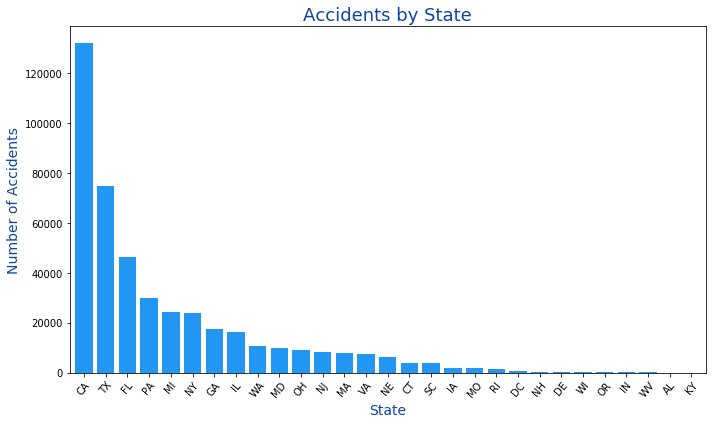

In [9]:
#Chart accidents by state
chart_accidents_by_state = accidents_by_state.plot(kind='bar', rot=50, figsize = (10, 6), width = .8, color = "#2196F3")
plt.title("Accidents by State", size =18, color="#0D47A1")
plt.xlabel("State",size =14, color="#0D47A1")
plt.ylabel("Number of Accidents",size =14, color="#0D47A1")
plt.tight_layout()
plt.savefig("Images/state.png")
plt.show()

In [10]:
#Look at accidents by day of week
accident_day = accident_df["Day"].value_counts()
accident_day

Tuesday      79108
Friday       78590
Thursday     77853
Wednesday    77675
Monday       74167
Saturday     27494
Sunday       24110
Name: Day, dtype: int64

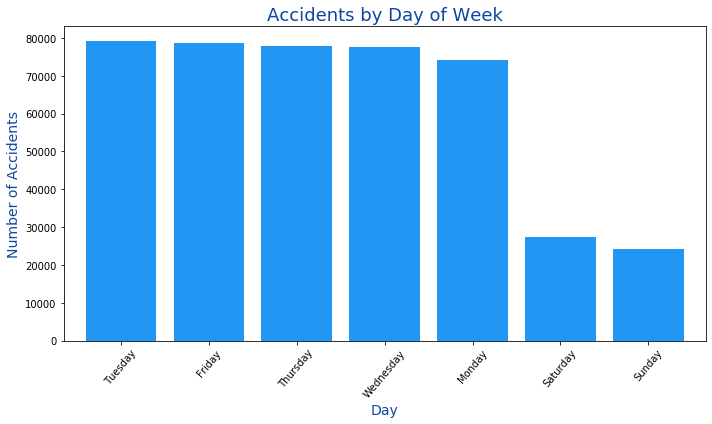

In [11]:
#Chart accidents by day of week
chart_accident_day = accident_day.plot(kind='bar', rot=50, figsize = (10, 6), width = .8, color = "#2196F3")
plt.title("Accidents by Day of Week", size =18, color="#0D47A1")
plt.xlabel("Day",size =14, color="#0D47A1")
plt.ylabel("Number of Accidents",size =14, color="#0D47A1")
plt.tight_layout()
plt.savefig("Images/day.png")
plt.show()

In [12]:
#Look at accidents by date
accident_date = accident_df["Date"].value_counts()
accident_date.head(10)

11/30/2016    2138
12/16/2016    2110
11/29/2016    2081
11/15/2016    2078
11/23/2016    2064
11/21/2016    2054
11/22/2016    2040
11/14/2016    2026
11/10/2016    2024
11/16/2016    2020
Name: Date, dtype: int64

In [13]:
#Look at accidents by month
accident_month = accident_df["Month"].value_counts()
accident_month.head(10)

November     46540
December     40655
September    39565
March        39465
January      38719
August       38541
October      38178
February     35374
April        33645
June         32128
Name: Month, dtype: int64

In [14]:
#Set up for axis in scatter
month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
         "November", "December"]
accidents = [38719, 35374, 39465, 33645, 25427, 32128, 30760, 38541, 39565, 38178, 46540, 40655]
accidents_by_month_df = pd.DataFrame({"Month": month, "Number of Accidents": accidents})
accidents_by_month_df
 

,Month,Number of Accidents
0,January,38719
1,February,35374
2,March,39465
3,April,33645
4,May,25427
5,June,32128
6,July,30760
7,August,38541
8,September,39565
9,October,38178


C:\Users\Euneese\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


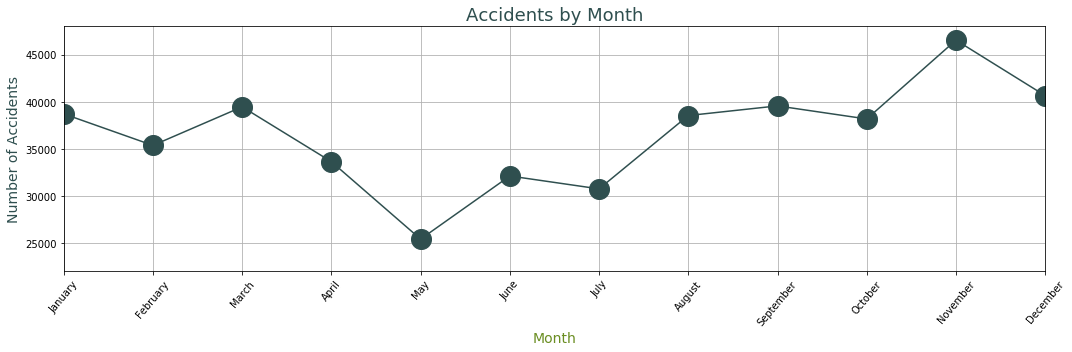

In [15]:
#Create scatter plot for accidents by month
accidents_by_month_df.plot(rot=50, figsize=(15,5), marker="o", colors="darkslategrey",
                            markersize=20, legend = False)
plt.ylim(22000, 48000)
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
         "November", "December"]
ticks = np.arange(0,len(labels),1)
plt.xticks(ticks, labels)
plt.title("Accidents by Month", size =18, color="darkslategrey")
plt.xlabel("Month", size =14, color="olivedrab")
plt.ylabel("Number of Accidents", size =14, color="darkslategrey")
plt.grid(True)
plt.tight_layout()

plt.savefig("Images/month.png")
plt.show()


In [16]:
#Look at accidents by year
accident_year = accident_df["Year"].value_counts()
accident_year

2016    234239
2017    204758
Name: Year, dtype: int64

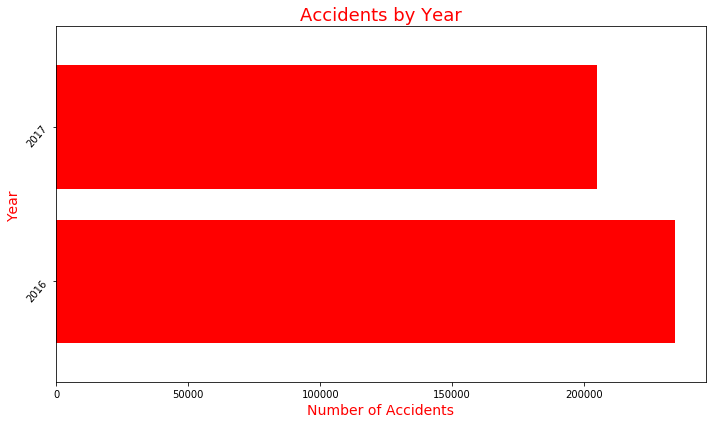

In [17]:
#Create horizontal bar chart for accidents by year
accident_year = accident_year.plot(kind='barh', rot=50, figsize = (10, 6), width = .8, color = "red")
plt.title("Accidents by Year", size =18, color="red")
plt.xlabel("Number of Accidents",size =14, color="red")
plt.ylabel("Year",size =14, color="red")
plt.tight_layout()
plt.savefig("Images/year.png")
plt.show()

In [18]:
#Distribution plot of accidents occuring on the left/right side of the road
road_side_count = accident_df["Side"].value_counts()
road_side_count

R    358010
L     80986
          1
Name: Side, dtype: int64

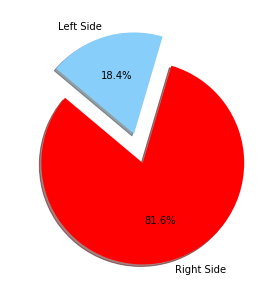

In [19]:
#Create pie chart for accidents by side of road
# Labels for the sections of our pie chart
labels = ["Right Side", "Left Side"]

# The values of each section of the pie chart
sizes = [358017, 80987]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# plot to show left and right side accidents
explode = (0.3, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Images/road_side.png")
plt.tight_layout()

In [20]:
#Get number of accidents at temperature points
temperature = accident_df["Temperature(F)"].value_counts()
temperature_count_df = pd.DataFrame({"Number of Accidents":temperature})
temperature_count_df = temperature_count_df.sort_values("Number of Accidents", ascending = False)
temperature_count_df.head(20)

,Number of Accidents
77.0,11158
68.0,10963
59.0,10119
73.0,7452
73.9,7406
63.0,7328
70.0,7129
72.0,7114
66.9,7106
62.1,7093


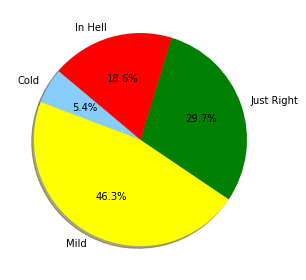

In [21]:
#Binned in Excel to capture datapoints
#Data for points below came from an excel pivot chart
# Labels for the sections of our pie chart
labels = ["Cold", "Mild", "Just Right", "In Hell"]

# The values of each section of the pie chart
sizes = [22962, 198693, 127533, 79934]

# The colors of each section of the pie chart
colors = ["lightskyblue", "yellow", "green", "red"]

# plot to show accidents and temp

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Images/temp_pie.png")
plt.tight_layout()

In [22]:
#Get number of accidents at humidity points
humidity = accident_df["Humidity(%)"].value_counts()
humidity_count_df = pd.DataFrame({"Number of Accidents":humidity})
humidity_count_df = humidity_count_df.sort_values("Number of Accidents", ascending = False)
humidity_count_df.head(20)

,Number of Accidents
100.0,15999
93.0,14516
87.0,10071
90.0,9362
78.0,8326
84.0,7610
81.0,7448
89.0,7360
94.0,7316
83.0,7290
